In [ ]:
!pip install biosimulators-utils smoldyn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.0/547.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.7/306.7 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
from google.colab import files

In [ ]:
!biosimulators-utils build-project --help

usage: biosimulators-utils build-project [-h]
                                         model-language model-filename simulation-type
                                         archive-filename

Build a COMBINE/OMEX archive with a SED-ML file for a model

positional arguments:
  model-language    Model language (`BNGL`, `CellML`, `RBA`, `SBML`, `Smoldyn`, or `XPP`)
  model-filename    Path to model
  simulation-type   Type of simulation (`OneStep`, `SteadyState`, or `UniformTimeCourse`)
  archive-filename  Path to save archive

options:
  -h, --help        show this help message and exit


In [ ]:
print('Upload the smoldyn file')
files.upload()

In [ ]:
!biosimulators-utils build-project \
    Smoldyn \
    /content/model.txt \
    UniformTimeCourse \
    /content/Andrews-Min1-PUBLICATION.omex

--------------------------------------------------------------
Running Smoldyn 2.72

CONFIGURATION FILE
 Path: '/content/'
 Name: 'tmp1fcvwcvl.txt'
 Reading file: '/content/tmp1fcvwcvl.txt'
 Loaded file successfully
 setting up molecules
 setting up virtual boxes
 setting up compartments
 setting up reactions
 setting up surfaces
 setting up graphics

SIMULATION PARAMETERS
 file: /content/tmp1fcvwcvl.txt
 starting clock time: Sat Feb 10 13:07:41 2024
 3 dimensions
 Accuracy level: 5
 Random number seed: 1
 Time from 0 to 10 step 0.002

GRAPHICS PARAMETERS
 No graphical output

WALL PARAMETERS
 wall 0: dimension x, at -2
 wall 1: dimension x, at 2
 wall 2: dimension y, at -0.5
 wall 3: dimension y, at 0.5
 wall 4: dimension z, at -0.5
 wall 5: dimension z, at 0.5
 system volume: 4
 system corners: (-2,-0.5,-0.5) and (2,0.5,0.5)

MOLECULE PARAMETERS
 6 molecule lists:
  list1, list2, list3, list4, list5, unassignedlist
 4 species defined:
 MinD_ATP:
  solution: difc=2.5, rms step=0.1, li

In [ ]:
from biosimulators_utils.combine.io import CombineArchiveReader

reader = CombineArchiveReader()

archive_dirname = '/content/Andrews-Min1-PUBLICATION'
archive_fp = '/content/Andrews-Min1-PUBLICATION.omex'

archive = reader.run(in_file=archive_fp,
                     out_dir=archive_dirname)

/usr/local/lib/python3.10/dist-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning: COMBINE/OMEX archive has warnings.
  - The manifest does not include its parent COMBINE/OMEX archive. Manifests should include their parent COMBINE/OMEX archives.
  warnings.warn(termcolor.colored(message, Colors.warning.value), category)


In [ ]:
# remove the auto-gen manifest
import os

auto_manifest_fp = '/content/Andrews-Min1-PUBLICATION/manifest.xml'
auto_omex = '/content/Andrews-Min1-PUBLICATION.omex'
if os.path.exists(auto_manifest_fp):
    os.remove(auto_manifest_fp)
if os.path.exists(auto_omex):
    os.remove(auto_omex)
    os.remove('/content/model.txt')
    os.remove('/content/modelout.txt')

In [ ]:
import shutil
# shutil.rmtree(archive_dirname)

In [ ]:
'''import datetime
citation_doi = '10.1186/1752-0509-7-74'
now = datetime.datetime.now()
metadata = {
    "combine_archive_uri": 'http://omex-library.org/Min1.omex',
    "uri": '.',
    'title': 'Min1',
    'abstract': 'Smoldyn interpretation of HWA Ecoli model',
    'keywords': [
        'particle-diffusion',
        'Smoldyn',
    ],
    'description': None,
    'taxa': [
        {
            'uri': 'http://identifiers.org/taxonomy:83333',
            'label': 'Escherichia coli K-12',
        },
    ],
    'encodes': [
        {
            'uri': 'http://identifiers.org/GO:0008152',
            'label': 'metabolic process',
        },
    ],
    'thumbnails': [
        ''
    ],
    'sources': [],
    'predecessors': [],
    'successors': [],
    'see_also': [],
    'creators': [{
        'uri': 'https://smoldyn.org',
        'label': 'Steve Andrews',
    }],
    'contributors': [{
        'uri': 'https://identifiers.org/orcid:0000-0002-2605-5080',
        'label': 'Jonathan Karr',
    }],
    'identifiers': [
        {
            'uri': 'http://identifiers.org/smoldyn.model/Min1.txt',
            'label': 'smoldyn.model:Min1',
        },
    ],
    'citations': [
        {
            'uri': 'http://identifiers.org/doi:' + citation_doi,
            'label': None,
        },
    ],
    'license': {
        'uri': 'http://bigg.ucsd.edu/license',
        'label': 'BiGG',
    },
    'funders': [],
    'created': '{}-{:02d}-{:02d}'.format(now.year, now.month, now.day),
    'modified': [
        '{}-{:02d}-{:02d}'.format(now.year, now.month, now.day),
    ],
    'other': [],
}'''

'import datetime\ncitation_doi = \'10.1186/1752-0509-7-74\'\nnow = datetime.datetime.now()\nmetadata = {\n    "combine_archive_uri": \'http://omex-library.org/Min1.omex\',\n    "uri": \'.\',\n    \'title\': \'Min1\',\n    \'abstract\': \'Smoldyn interpretation of HWA Ecoli model\',\n    \'keywords\': [\n        \'particle-diffusion\',\n        \'Smoldyn\',\n    ],\n    \'description\': None,\n    \'taxa\': [\n        {\n            \'uri\': \'http://identifiers.org/taxonomy:83333\',\n            \'label\': \'Escherichia coli K-12\',\n        },\n    ],\n    \'encodes\': [\n        {\n            \'uri\': \'http://identifiers.org/GO:0008152\',\n            \'label\': \'metabolic process\',\n        },\n    ],\n    \'thumbnails\': [\n        \'\'\n    ],\n    \'sources\': [],\n    \'predecessors\': [],\n    \'successors\': [],\n    \'see_also\': [],\n    \'creators\': [{\n        \'uri\': \'https://smoldyn.org\',\n        \'label\': \'Steve Andrews\',\n    }],\n    \'contributors\': [{\n

In [ ]:
print('Upload the metadata file from Lotka Volterra: ')
from google.colab import files

files.upload()

Upload the metadata file from Lotka Volterra: 


Saving metadata.rdf to metadata.rdf


{'metadata.rdf': b'<?xml version="1.1" encoding="utf-8"?>\n<rdf:RDF xmlns:OMEXlib="http://omex-library.org/"\n   xmlns:bqbiol="http://biomodels.net/biology-qualifiers/"\n   xmlns:bqmodel="http://biomodels.net/model-qualifiers/"\n   xmlns:dc="http://purl.org/dc/terms/"\n   xmlns:foaf="http://xmlns.com/foaf/0.1/"\n   xmlns:local="http://omex-library.org/NewOmex.omex/NewModel.rdf#"\n   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n  <rdf:Description rdf:about="http://omex-library.org/Min1.omex">\n    <bqmodel:is rdf:resource="local:00003"/>\n    <bqmodel:isDescribedBy rdf:resource="local:00004"/>\n    <ns1:abstract xmlns:ns1="http://purl.org/dc/elements/1.1/">\n E. coli Min system, based on Huang, Meir, Wingreen (HMW) with surface diffusion.\n \n Motivation: Smoldyn is a spatial and stochastic biochemical simulator. \n It treats each molecule of interest as an individual particle in continuous space, \n simulating molecular diffusion, molecule-membrane interactions and chemica

In [ ]:
from biosimulators_utils.omex_meta.io import BiosimulationsOmexMetaReader as omexReader

metadata_file = omexReader().run('/content/metadata.rdf')

metadata = metadata_file[0][0]

In [ ]:
metadata

{'uri': '.',
 'combine_archive_uri': 'http://omex-library.org/Min1.omex',
 'title': 'E. coli Min system based on Huang, Meir, Wingreen (Andrews, 2009)',
 'abstract': '\n E. coli Min system, based on Huang, Meir, Wingreen (HMW) with surface diffusion.\n \n Motivation: Smoldyn is a spatial and stochastic biochemical simulator. \n It treats each molecule of interest as an individual particle in continuous space, \n simulating molecular diffusion, molecule-membrane interactions and chemical reactions, \n all with good accuracy.\n',
 'keywords': [],
 'description': None,
 'taxa': [],
 'encodes': [],
 'thumbnails': [],
 'sources': [],
 'predecessors': [],
 'references': [],
 'successors': [],
 'see_also': [],
 'creators': [{'uri': None, 'label': 'Steven Andrews'}],
 'contributors': [{'uri': 'http://identifiers.org/orcid:0009-0002-6886-2291',
   'label': 'Alex Patrie'}],
 'identifiers': [{'uri': 'https://github.com/ssandrews/Smoldyn/blob/master/examples/S99_more/Min/Min1.txt',
   'label': 'sm

In [ ]:
metadata.get('citations')

[{'uri': 'http://identifiers.org/doi:10.1093/bioinformatics/btw700',
  'label': 'Steven S Andrews. Smoldyn: particle-based simulation with rule-based modeling, improved molecular interaction and a library interface. Bioinformatics 33, 5 (2017).'}]

In [ ]:

archive_uri = metadata['combine_archive_uri']
metadata['combine_archive_uri'] = archive_uri.replace('Lotka-Volterra', 'Min1')
metadata['title'] = 'E. coli Min system based on Huang, Meir, Wingreen (Andrews, 2009)'
# metadata['abstract'] = 'E. coli Min system, based on Huang, Meir, Wingreen (HMW). This model is the HMW system exactly, plus surface diffusion. Units are micron, second.'
metadata['abstract'] = """
 E. coli Min system, based on Huang, Meir, Wingreen (HMW) with surface diffusion.

 Motivation: Smoldyn is a spatial and stochastic biochemical simulator.
 It treats each molecule of interest as an individual particle in continuous space,
 simulating molecular diffusion, molecule-membrane interactions and chemical reactions,
 all with good accuracy.
"""
metadata['contributors'] = [{
    'uri': 'http://identifiers.org/orcid:0009-0002-6886-2291',
    'label': 'Alex Patrie'
}]
metadata['identifiers'] = [{
    'uri': 'https://github.com/ssandrews/Smoldyn/blob/master/examples/S99_more/Min/Min1.txt',
    'label': 'smoldyn:S99_more/Min/Min1.txt'
}]

metadata

{'uri': '.',
 'combine_archive_uri': 'http://omex-library.org/Min1.omex',
 'title': 'E. coli Min system based on Huang, Meir, Wingreen (Andrews, 2009)',
 'abstract': '\n E. coli Min system, based on Huang, Meir, Wingreen (HMW) with surface diffusion.\n \n Motivation: Smoldyn is a spatial and stochastic biochemical simulator. \n It treats each molecule of interest as an individual particle in continuous space, \n simulating molecular diffusion, molecule-membrane interactions and chemical reactions, \n all with good accuracy.\n',
 'keywords': [],
 'description': None,
 'taxa': [],
 'encodes': [],
 'thumbnails': [],
 'sources': [],
 'predecessors': [],
 'references': [],
 'successors': [],
 'see_also': [],
 'creators': [{'uri': None, 'label': 'Steven Andrews'}],
 'contributors': [{'uri': 'http://identifiers.org/orcid:0009-0002-6886-2291',
   'label': 'Alex Patrie'}],
 'identifiers': [{'uri': 'https://github.com/ssandrews/Smoldyn/blob/master/examples/S99_more/Min/Min1.txt',
   'label': 'sm

In [ ]:
from biosimulators_utils.ref.utils import get_reference

citation_doi = '10.1093/bioinformatics/btw700'
citation = get_reference(doi=citation_doi)
metadata['citations'][0]['label'] = citation.get_citation()

citation

/usr/local/lib/python3.10/dist-packages/Bio/Entrez/__init__.py:723: UserWarning: 
            Email address is not specified.

            To make use of NCBI's E-utilities, NCBI requires you to specify your
            email address with each request.  As an example, if your email address
            is A.N.Other@example.com, you can specify it as follows:
               from Bio import Entrez
               Entrez.email = 'A.N.Other@example.com'
            In case of excessive usage of the E-utilities, NCBI will attempt to contact
            a user at the email address provided before blocking access to the
            E-utilities.
  warnings.warn(


JournalArticle(pubmed_id='28365760', pubmed_central_id=None, doi='10.1093/bioinformatics/btw700', authors=['Steven S Andrews'], title='Smoldyn: particle-based simulation with rule-based modeling, improved molecular interaction and a library interface', journal='Bioinformatics', volume='33', issue='5', pages=None, year='2017', date='2017-03-01')

In [ ]:
# TO MODIFY
import datetime

today = datetime.datetime.today()
today = str(today).split()[0]

In [ ]:
metadata['created'] = '2024-01-15'
last_modified = metadata['modified']
metadata['modified'].pop()
metadata['modified'].append(today)

In [ ]:
metadata

{'uri': '.',
 'combine_archive_uri': 'http://omex-library.org/Min1.omex',
 'title': 'E. coli Min system based on Huang, Meir, Wingreen (Andrews, 2009)',
 'abstract': '\n E. coli Min system, based on Huang, Meir, Wingreen (HMW) with surface diffusion.\n \n Motivation: Smoldyn is a spatial and stochastic biochemical simulator. \n It treats each molecule of interest as an individual particle in continuous space, \n simulating molecular diffusion, molecule-membrane interactions and chemical reactions, \n all with good accuracy.\n',
 'keywords': [],
 'description': None,
 'taxa': [],
 'encodes': [],
 'thumbnails': [],
 'sources': [],
 'predecessors': [],
 'references': [],
 'successors': [],
 'see_also': [],
 'creators': [{'uri': None, 'label': 'Steven Andrews'}],
 'contributors': [{'uri': 'http://identifiers.org/orcid:0009-0002-6886-2291',
   'label': 'Alex Patrie'}],
 'identifiers': [{'uri': 'https://github.com/ssandrews/Smoldyn/blob/master/examples/S99_more/Min/Min1.txt',
   'label': 'sm

In [ ]:
from biosimulators_utils.ref.utils import get_pubmed_central_open_access_graphics

thumbnails = get_pubmed_central_open_access_graphics(
    citation_doi,
    archive_dirname,
)

In [ ]:
thumbnails

[]

In [ ]:
metadata['thumbnails'] = [os.path.relpath(thumbnail.filename, archive_dirname) for thumbnail in thumbnails]

In [ ]:
metadata

{'uri': '.',
 'combine_archive_uri': 'http://omex-library.org/Min1.omex',
 'title': 'E. coli Min system based on Huang, Meir, Wingreen (Andrews, 2009)',
 'abstract': '\n E. coli Min system, based on Huang, Meir, Wingreen (HMW) with surface diffusion.\n \n Motivation: Smoldyn is a spatial and stochastic biochemical simulator. \n It treats each molecule of interest as an individual particle in continuous space, \n simulating molecular diffusion, molecule-membrane interactions and chemical reactions, \n all with good accuracy.\n',
 'keywords': [],
 'description': None,
 'taxa': [],
 'encodes': [],
 'thumbnails': [],
 'sources': [],
 'predecessors': [],
 'references': [],
 'successors': [],
 'see_also': [],
 'creators': [{'uri': None, 'label': 'Steven Andrews'}],
 'contributors': [{'uri': 'http://identifiers.org/orcid:0009-0002-6886-2291',
   'label': 'Alex Patrie'}],
 'identifiers': [{'uri': 'https://github.com/ssandrews/Smoldyn/blob/master/examples/S99_more/Min/Min1.txt',
   'label': 'sm

In [ ]:
from biosimulators_utils.omex_meta.io import BiosimulationsOmexMetaWriter

metadata_filename = os.path.join(archive_dirname, 'metadata.rdf')
BiosimulationsOmexMetaWriter().run([metadata], metadata_filename)


In [ ]:
from biosimulators_utils.combine.data_model import CombineArchive, CombineArchiveContent, CombineArchiveContentFormat

In [ ]:
!cat /content/Andrews-Min1-PUBLICATION/metadata.rdf

<?xml version="1.1" encoding="utf-8"?>
<rdf:RDF xmlns:OMEXlib="http://omex-library.org/"
   xmlns:bqbiol="http://biomodels.net/biology-qualifiers/"
   xmlns:bqmodel="http://biomodels.net/model-qualifiers/"
   xmlns:dc="http://purl.org/dc/terms/"
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:local="http://omex-library.org/NewOmex.omex/NewModel.rdf#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
  <rdf:Description rdf:about="http://omex-library.org/Min1.omex">
    <bqmodel:is rdf:resource="local:00003"/>
    <bqmodel:isDescribedBy rdf:resource="local:00004"/>
    <ns1:abstract xmlns:ns1="http://purl.org/dc/elements/1.1/">
 E. coli Min system, based on Huang, Meir, Wingreen (HMW) with surface diffusion.
 
 Motivation: Smoldyn is a spatial and stochastic biochemical simulator. 
 It treats each molecule of interest as an individual particle in continuous space, 
 simulating molecular diffusion, molecule-membrane interactions and chemical reactions, 
 all with good accura

In [ ]:
for c in archive.contents:
    print(c.location)


model.txt
simulation.sedml


In [ ]:
archive = CombineArchive()

In [ ]:
for c in archive.contents:
    print(c.location)

In [ ]:
archive.contents

[]

In [ ]:
!cat /content/Andrews-Min1/manifest.xml

cat: /content/Andrews-Min1/manifest.xml: No such file or directory


In [ ]:
len(thumbnails)

NameError: name 'thumbnails' is not defined

In [ ]:
# remove sed file and upload the working one (OR CHECK THAT ALL DATA IDS ARE SEAMLESS)
if os.path.exists('/content/Andrews-Min1-PUBLICATION/simulation.sedml'):
    os.remove('/content/Andrews-Min1-PUBLICATION/simulation.sedml')

print('upload the working sedml')
files.upload()

!mv /content/simulation.sedml /content/Andrews-Min1-PUBLICATION

upload the working sedml


Saving simulation.sedml to simulation.sedml


In [ ]:
archive.contents

[]

In [ ]:
"""Ensure that the archive contents are empty"""


archive.contents.append(CombineArchiveContent(
    location='model.txt',
    format=CombineArchiveContentFormat.Smoldyn.value
))

# add the SED-ML file to the archive
archive.contents.append(CombineArchiveContent(
    location='simulation.sedml',
    format=CombineArchiveContentFormat.SED_ML.value,
    master=True,
))

# add the RDF metadata file to the archive
archive.contents.append(CombineArchiveContent(
    location='metadata.rdf',
    format=CombineArchiveContentFormat.OMEX_METADATA.value,
))

# add thumbnails to the archive
'''for thumbnail in thumbnails:
    archive.contents.append(CombineArchiveContent(
        location=os.path.relpath(thumbnail.filename, archive_dirname),
        format=CombineArchiveContentFormat.JPEG.value,
    ))'''

'''archive.contents.append(CombineArchiveContent(
    location='manifest.xml',
    format=CombineArchiveContentFormat.OMEX_MANIFEST.value,
))
'''

"archive.contents.append(CombineArchiveContent(\n    location='manifest.xml',\n    format=CombineArchiveContentFormat.OMEX_MANIFEST.value,\n))\n"

In [ ]:
archive.contents = []

In [ ]:
print([c.location for c in archive.contents])

['model.txt', 'simulation.sedml', 'metadata.rdf']


In [ ]:
from biosimulators_utils.combine.io import CombineArchiveWriter

manifest_fn = os.path.join(archive_dirname, 'manifest.xml')

if os.path.exists(manifest_fn):
    os.remove(manifest_fn)

writer = CombineArchiveWriter()


writer.write_manifest(archive.contents, manifest_fn)

In [ ]:
!cat /content/Andrews-Min1-PUBLICATION/manifest.xml

<?xml version="1.0" encoding="UTF-8"?>
<omexManifest xmlns="http://identifiers.org/combine.specifications/omex-manifest">
  <content location="model.txt" format="http://purl.org/NET/mediatypes/text/smoldyn+plain" master="false"/>
  <content location="simulation.sedml" format="http://identifiers.org/combine.specifications/sed-ml" master="true"/>
  <content location="metadata.rdf" format="http://identifiers.org/combine.specifications/omex-metadata" master="false"/>
</omexManifest>


In [ ]:
archive_dirname

'/content/Andrews-Min1-PUBLICATION'

In [ ]:
from biosimulators_utils.combine.io import CombineArchiveWriter

archive_filename = '/content/Andrews-Min1-PUBLICATION.omex'
CombineArchiveWriter().run(archive, archive_dirname, archive_filename)

In [ ]:
from IPython.display import FileLink, FileLinks

In [ ]:
"""Ensure that there are at least 4 files here: manifest.xml, model.txt, metadata.rdf, simulation.sedml"""
FileLinks(archive_dirname)

/content/Andrews-Min1-PUBLICATION/
  simulation.sedml
  metadata.rdf
  manifest.xml
  model.txt

In [ ]:
"""Ensure that there are 4 - 1 (3) files here and not the manifest"""
print([c.location for c in archive.contents])

['model.txt', 'simulation.sedml', 'metadata.rdf']


In [ ]:
"""Verify omex name"""
FileLink(archive_filename)

/content/Andrews-Min1-PUBLICATION.omex

In [ ]:
from biosimulators_utils.config import Config, get_config

output_dirname = '/content/Min1-output'
os.mkdir(output_dirname)

config = get_config()

In [ ]:
archive_filename

'/content/Andrews-Min1-PUBLICATION.omex'

/usr/local/lib/python3.10/dist-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning: COMBINE/OMEX archive has warnings.
  - The manifest does not include its parent COMBINE/OMEX archive. Manifests should include their parent COMBINE/OMEX archives.
  warnings.warn(termcolor.colored(message, Colors.warning.value), category)
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 13 data sets
    Plots (1):
      Figure: 4 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure` .../usr/local/lib/python3.10/dist-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning: A title co

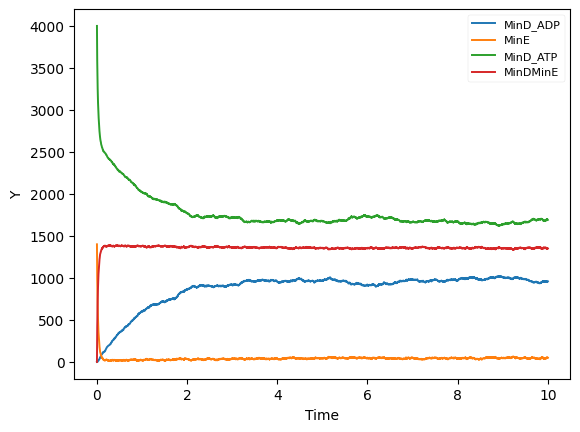

In [ ]:
from smoldyn.biosimulators.combine import exec_sedml_docs_in_combine_archive

results_smoldyn, _ = exec_sedml_docs_in_combine_archive(
    archive_filename,
    output_dirname,
    config=config
)

In [ ]:
from biosimulators_utils.biosimulations.utils import run_simulation_project, publish_simulation_project

In [ ]:
archive_filename = '/content/Andrews-Min1-PUBLICATION.omex'

In [ ]:
"""Submit the simulation"""


run_id = run_simulation_project(
    name=metadata['title'],
    filename_or_url=archive_filename,
    simulator='smoldyn')

In [ ]:
print('https://run.biosimulations.org/simulations/' + run_id)

https://run.biosimulations.org/simulations/65c775d44dd9c6ee19067b54


In [ ]:
pub_project_id = 'E-coli-Min-plots-ADJUSTED'

In [ ]:
pub = publish_simulation_project(
    run_id=run_id,
    project_id=pub_project_id
)

In [ ]:
pub

In [ ]:
!pip install networkx

In [12]:
from biosimulators_utils.sedml.data_model import SedDocument
from pydantic import BaseModel


doc = SedDocument()

In [13]:
doc.to_tuple()

(1, 3, (), (), (), (), (), (), None)

In [14]:
filtered_attributes = [attr for attr in dir(doc) if not attr.startswith('__')]

print(filtered_attributes)

['_abc_impl', 'data_generators', 'is_equal', 'level', 'metadata', 'models', 'outputs', 'simulations', 'styles', 'tasks', 'to_tuple', 'version']


In [15]:
doc.__dict__

{'level': 1,
 'version': 3,
 'models': [],
 'simulations': [],
 'tasks': [],
 'data_generators': [],
 'outputs': [],
 'styles': [],
 'metadata': None}